In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from matplotlib import pyplot as plt

In [4]:
tickers=['IFF','SPY','MCD','BA','MSFT','HD','USB','EL','NEE']

In [5]:
data = pd.DataFrame()
for item in tickers:
    data[item]=web.DataReader(item, data_source ='yahoo',start='01-03-2017')['Adj Close']

In [6]:
data.head(10)

,IFF,SPY,MCD,BA,MSFT,HD,USB,EL,NEE
Date,,,,,,,,,
2017-01-03,111.347527,214.830276,112.357178,147.253906,59.694695,126.547295,48.274361,75.022438,111.001686
2017-01-04,111.556595,216.108322,112.225670,148.801788,59.427597,127.668533,48.630840,76.351547,111.328934
2017-01-05,110.330688,215.936646,112.432312,148.886230,59.427597,126.160988,47.814697,76.254539,111.263481
2017-01-06,110.254662,216.709229,113.427963,149.252075,59.942703,125.812393,48.124271,76.797829,110.936234
2017-01-09,109.817528,215.993881,113.117989,148.520355,59.751923,126.547295,47.908512,75.905273,110.655724
2017-01-10,109.741501,215.993881,112.948921,149.223938,59.732849,128.233841,48.049221,75.041832,110.870789
2017-01-11,110.520767,216.604294,113.540657,149.533508,60.276566,127.856972,48.583942,75.992592,111.646820
2017-01-12,109.532433,216.060669,114.686607,148.492203,59.723312,127.263390,48.246220,76.778397,111.730972
2017-01-13,110.862869,216.556625,114.123032,148.998764,59.809166,127.235115,48.490120,76.438866,111.310234


In [7]:
daily_returns=data.pct_change()
daily_returns.head()

,IFF,SPY,MCD,BA,MSFT,HD,USB,EL,NEE
Date,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.001878,0.005949,-0.001170,0.010512,-0.004474,0.008860,0.007384,0.017716,0.002948
2017-01-05,-0.010989,-0.000794,0.001841,0.000567,0.000000,-0.011808,-0.016782,-0.001271,-0.000588
2017-01-06,-0.000689,0.003578,0.008856,0.002457,0.008668,-0.002763,0.006474,0.007125,-0.002941
2017-01-09,-0.003965,-0.003301,-0.002733,-0.004903,-0.003183,0.005841,-0.004483,-0.011622,-0.002529


In [8]:
annual_returns=daily_returns.mean()*252
annual_returns

IFF     0.054993
SPY     0.121316
MCD     0.267106
BA      0.349169
MSFT    0.341203
HD      0.206109
USB     0.044114
EL      0.358842
NEE     0.265661
dtype: float64

In [10]:
weights=[0.15,0.1,0.25,0.1,0.08,0.07,0.02,0.1,0.13]
sum(weights)

1.0

In [11]:
port_returns=np.sum(weights*daily_returns.mean())
port_returns
print(str(round(port_returns*100,2))+'%')

0.09%


In [12]:
daily_returns['portfolio']= daily_returns.dot(weights)

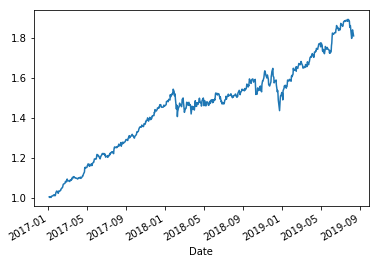

In [13]:
daily_cum_ret=(1+daily_returns).cumprod()
daily_cum_ret.portfolio.plot()

In [14]:
port_returns=daily_returns.iloc[:,[9]]
port_returns_nan=port_returns.dropna(axis=0, how='any')
port_returns

,portfolio
Date,
2017-01-03,NaN
2017-01-04,0.004200
2017-01-05,-0.002576
2017-01-06,0.003674
2017-01-09,-0.003525
2017-01-10,0.000077
2017-01-11,0.005787
2017-01-12,0.000168
2017-01-13,0.000433


In [15]:
daily_returns = daily_returns.drop(columns='portfolio')


In [16]:
cov_matrix_d=daily_returns.cov()
print(cov_matrix_d)

           IFF       SPY       MCD        BA      MSFT        HD  \
IFF   0.000200  0.000047  0.000027  0.000066  0.000058  0.000048   
SPY   0.000047  0.000067  0.000033  0.000082  0.000093  0.000063   
MCD   0.000027  0.000033  0.000107  0.000035  0.000045  0.000036   
BA    0.000066  0.000082  0.000035  0.000280  0.000110  0.000080   
MSFT  0.000058  0.000093  0.000045  0.000110  0.000198  0.000080   
HD    0.000048  0.000063  0.000036  0.000080  0.000080  0.000132   
USB   0.000043  0.000056  0.000026  0.000062  0.000063  0.000047   
EL    0.000060  0.000059  0.000033  0.000081  0.000081  0.000053   
NEE   0.000014  0.000013  0.000021  0.000006  0.000023  0.000014   

               USB        EL           NEE  
IFF   4.305842e-05  0.000060  1.443914e-05  
SPY   5.570324e-05  0.000059  1.316253e-05  
MCD   2.640624e-05  0.000033  2.111845e-05  
BA    6.231823e-05  0.000081  6.032125e-06  
MSFT  6.262839e-05  0.000081  2.332692e-05  
HD    4.653982e-05  0.000053  1.364475e-05  
USB 

In [17]:
cov_matrix_annual = cov_matrix_d*250
print(cov_matrix_annual)

           IFF       SPY       MCD        BA      MSFT        HD       USB  \
IFF   0.049939  0.011746  0.006866  0.016599  0.014580  0.011900  0.010765   
SPY   0.011746  0.016703  0.008218  0.020569  0.023322  0.015770  0.013926   
MCD   0.006866  0.008218  0.026858  0.008664  0.011137  0.009118  0.006602   
BA    0.016599  0.020569  0.008664  0.069931  0.027539  0.020033  0.015580   
MSFT  0.014580  0.023322  0.011137  0.027539  0.049381  0.019928  0.015657   
HD    0.011900  0.015770  0.009118  0.020033  0.019928  0.033115  0.011635   
USB   0.010765  0.013926  0.006602  0.015580  0.015657  0.011635  0.027225   
EL    0.014954  0.014807  0.008372  0.020291  0.020291  0.013294  0.010048   
NEE   0.003610  0.003291  0.005280  0.001508  0.005832  0.003411 -0.000153   

            EL       NEE  
IFF   0.014954  0.003610  
SPY   0.014807  0.003291  
MCD   0.008372  0.005280  
BA    0.020291  0.001508  
MSFT  0.020291  0.005832  
HD    0.013294  0.003411  
USB   0.010048 -0.000153  
EL 

In [18]:
cov_matrix_d=daily_returns.cov()
print(cov_matrix_d)

           IFF       SPY       MCD        BA      MSFT        HD  \
IFF   0.000200  0.000047  0.000027  0.000066  0.000058  0.000048   
SPY   0.000047  0.000067  0.000033  0.000082  0.000093  0.000063   
MCD   0.000027  0.000033  0.000107  0.000035  0.000045  0.000036   
BA    0.000066  0.000082  0.000035  0.000280  0.000110  0.000080   
MSFT  0.000058  0.000093  0.000045  0.000110  0.000198  0.000080   
HD    0.000048  0.000063  0.000036  0.000080  0.000080  0.000132   
USB   0.000043  0.000056  0.000026  0.000062  0.000063  0.000047   
EL    0.000060  0.000059  0.000033  0.000081  0.000081  0.000053   
NEE   0.000014  0.000013  0.000021  0.000006  0.000023  0.000014   

               USB        EL           NEE  
IFF   4.305842e-05  0.000060  1.443914e-05  
SPY   5.570324e-05  0.000059  1.316253e-05  
MCD   2.640624e-05  0.000033  2.111845e-05  
BA    6.231823e-05  0.000081  6.032125e-06  
MSFT  6.262839e-05  0.000081  2.332692e-05  
HD    4.653982e-05  0.000053  1.364475e-05  
USB 

In [19]:
weights=np.array([0.15,0.1,0.25,0.1,0.08,0.07,0.02,0.1,0.13])
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
print(port_variance)

0.01391726114203403


In [20]:
port_std=np.sqrt(port_variance)
print(port_std)

0.11797144206134819


In [21]:
port_corr=daily_returns.corr()
port_corr

,IFF,SPY,MCD,BA,MSFT,HD,USB,EL,NEE
IFF,1.000000,0.406708,0.187476,0.280879,0.293608,0.292626,0.291941,0.288855,0.112476
SPY,0.406708,1.000000,0.388022,0.601841,0.812083,0.670561,0.653046,0.494582,0.177290
MCD,0.187476,0.388022,1.000000,0.199927,0.305812,0.305727,0.244134,0.220521,0.224319
BA,0.280879,0.601841,0.199927,1.000000,0.468638,0.416298,0.357057,0.331225,0.039708
MSFT,0.293608,0.812083,0.305812,0.468638,1.000000,0.492795,0.427020,0.394172,0.182732
HD,0.292626,0.670561,0.305727,0.416298,0.492795,1.000000,0.387498,0.315354,0.130524
USB,0.291941,0.653046,0.244134,0.357057,0.427020,0.387498,1.000000,0.262871,-0.006464
EL,0.288855,0.494582,0.220521,0.331225,0.394172,0.315354,0.262871,1.000000,0.124926
NEE,0.112476,0.177290,0.224319,0.039708,0.182732,0.130524,-0.006464,0.124926,1.000000


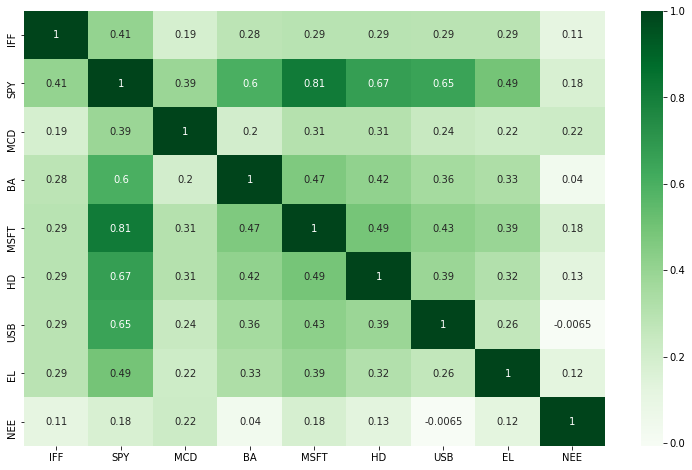

In [22]:
import seaborn as sns
plt.figure(figsize=(13,8))
sns.heatmap(port_corr,annot=True,cmap="Greens")

In [23]:
portfolio_returns=port_returns['portfolio']

In [24]:
from scipy import stats
mu=np.mean(portfolio_returns)
std=np.std(portfolio_returns)
vol= std*std
confidence_level=0.05
Parametric_var=stats.norm.ppf(confidence_level,mu,std)
Parametric_var

-0.011330221901271847

In [25]:
T=252
sim_returns=[]
for i in range(100):
     rand_rets=np.random.normal(mu,vol,T)
     sim_returns.append(rand_rets)
MC_var_95=np.percentile(sim_returns,5)
MC_var_95

0.0008416176803294162